In [174]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [175]:
with open("data_1.csv") as fo:
    data1 = csv.reader(fo)
    X = [[]]
    y = []
    for row in data1:
        if(row[0] == "x"): continue
        X.append([pow(float(row[0]), i) for i in range(0,10)])
        y.append([float(row[1])])
    X = X[1:]
    X = np.array(X)
    y = np.array(y)
    
    print(X.shape)
    print(y.shape)
    #print(X)
    #print(y)

(100, 10)
(100, 1)


In [176]:
train_n = int(len(X)*0.7)
train_X = X[:train_n]
train_y = y[:train_n]
test_X = X[train_n:]
test_y = y[train_n:]

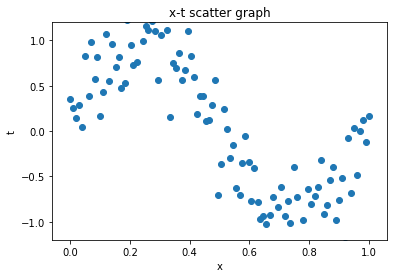

In [177]:
plt.figure()
plt.scatter([x[1] for x in X],y)
plt.xlabel("x")
plt.ylabel("t")
plt.title("x-t scatter graph")
plt.ylim(-1.2,1.2)
#plt.legend()
plt.show()

In [178]:
learning_rate = 0.01
epoch = 1000

In [179]:
def calc_pred(w, x):
    return np.matmul(x, w)

def calc_error(p, y):
    return np.add.reduce((p-y)*(p-y))/(2*len(p))

def calc_grad(w, x, t):
    #print(np.matmul(x,w).shape)
    #print(x.shape)
    dedw = np.asarray([-(t-np.matmul(x, w))*x[wi] for wi in range(len(w))])
    return dedw

#print(np.asarray([1,2,3])*np.asarray([2, 2, 2]))

In [180]:
#do gradient descent:
#print(np.add.reduce((np.asarray([0, 0, 0])-np.asarray([2, 2, 2]))*(np.asarray([0, 0, 0])-np.asarray([2, 2, 2])))/(2*3))
#model = x(100, 10)*w(10, 1) = pred(100,1)
node_in = 10
node_out = 1
W = np.random.randn(node_in, node_out) / np.sqrt(node_in / 2)
print(W.shape)
print(W)

for ep_i in range(1, epoch+1):
    p = calc_pred(W, train_X)
    for g_i in range(len(train_X)):
        W -= learning_rate*calc_grad(W, train_X[g_i], train_y[g_i][0])
    if(ep_i%50 == 0):
        print("training error now = {}".format(calc_error(p, train_y)))
    

(10, 1)
[[ 0.40239885]
 [-0.08008723]
 [ 0.47949236]
 [ 0.2284049 ]
 [ 0.99776019]
 [ 0.52169794]
 [ 0.37824647]
 [ 0.16305435]
 [-0.44538231]
 [ 0.50686084]]
training error now = [0.0914839]
training error now = [0.08513058]
training error now = [0.08216605]
training error now = [0.07974687]
training error now = [0.0776365]
training error now = [0.07580551]
training error now = [0.07422276]
training error now = [0.07285311]
training error now = [0.07166352]
training error now = [0.0706252]
training error now = [0.06971372]
training error now = [0.06890863]
training error now = [0.06819285]
training error now = [0.06755215]
training error now = [0.06697467]
training error now = [0.06645051]
training error now = [0.06597143]
training error now = [0.06553054]
training error now = [0.0651221]
training error now = [0.06474131]


(100,)
(100, 1)


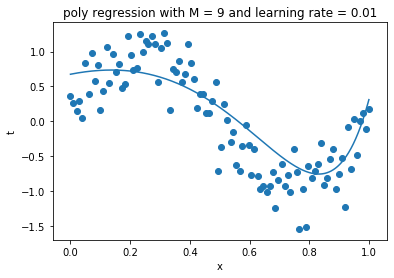

In [185]:
plt.figure()
xs = np.linspace(0, 1, 1000)
ys = np.asarray([ np.matmul(np.asarray([[pow(x, i) for i in range(len(W))]]), W)[0][0] for x in xs])
print(np.asarray([x[1] for x in X]).shape)
print(np.asarray(y).shape)
plt.scatter([x[1] for x in X],y)
plt.plot(xs,ys)
plt.xlabel("x")
plt.ylabel("t")
plt.title("poly regression with M = {} and learning rate = {}".format(9, learning_rate))
#plt.legend()
plt.show()
